In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()
# SibSp: if the passenger has a sibling on board
# Parch: has parent or child on board
# Embarked: cities initial

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# quick grab of the dframe summary
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:



5.) What factors helped someone survive the sinking?
So let's start with the first question: Who were the passengers on the titanic?

In [4]:
import seaborn as sns
%matplotlib inline

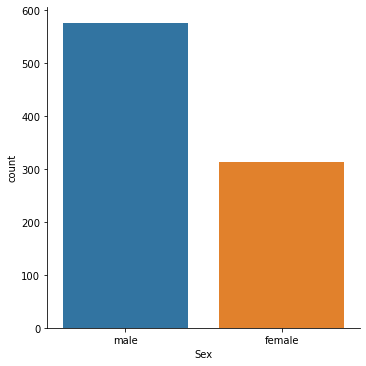

In [5]:
# using seaborn to get a quick visual on male to female ratio
sns.catplot(x = 'Sex', data = titanic_df, kind = 'count')

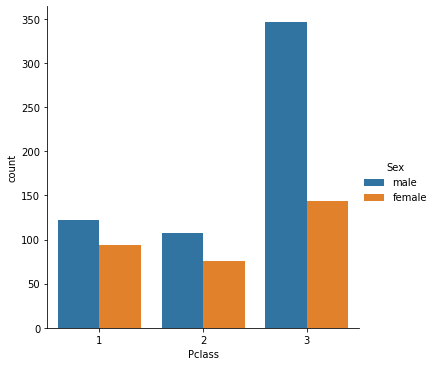

In [6]:
# graphing the Pclass by passengers gender, notice: there are much more male to female in 3rd class group
sns.catplot(x='Pclass', data = titanic_df, hue = 'Sex', kind = 'count')

In [7]:
# checking if a passenger is a child
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [8]:
# creating a new column indicating whether the passenger is male or female or a child
# notice the apply method take in axis=1 since this is a column passed in the param not index/row
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [9]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


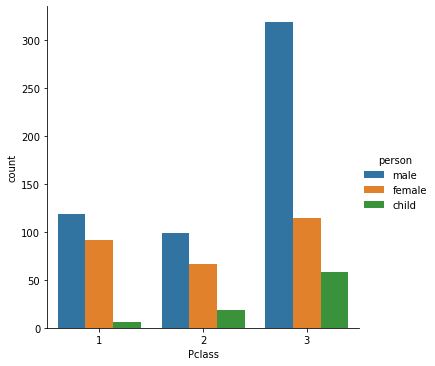

In [10]:
# do another quick chart of passenger gender and age group
sns.catplot(x = 'Pclass', data = titanic_df, hue = 'person', kind = 'count')

<AxesSubplot:>

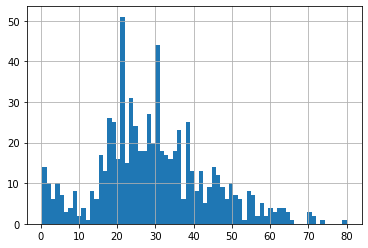

In [11]:
# crewating a quick histogram for distribution of the ages for a clearer picture of how old they are
titanic_df['Age'].hist(bins=70)

In [12]:
# what is the mean/avg age for all passengers
titanic_df['Age'].mean()

29.69911764705882

In [13]:
# grab the actual count of 'person'
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

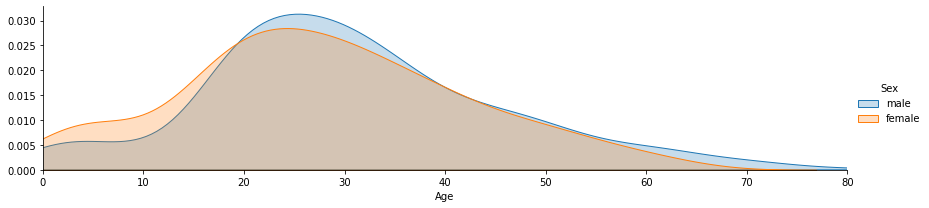

In [14]:
# utilizing facet grid grab to plot multiple plots on 1 figure
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

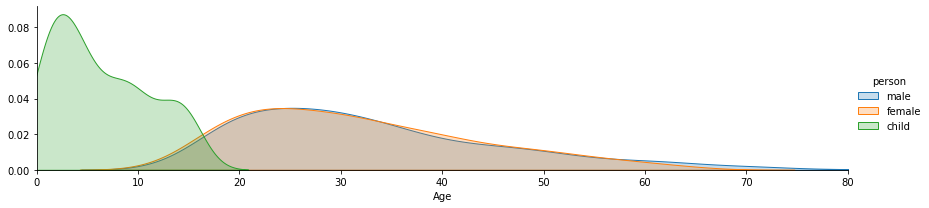

In [15]:
# adding children

fig = sns.FacetGrid(titanic_df, hue = 'person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

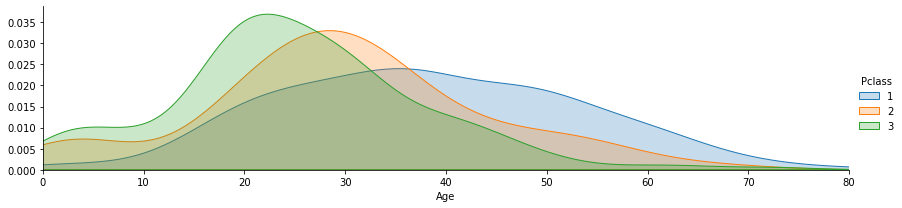

In [16]:
# by class

fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

#### grabbing the deck classified level [a,b,c,d]

In [17]:
deck = titanic_df['Cabin'].dropna()
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [18]:
# grabbing the first letter of the cabin level in Cabin column
levels = [level[0] for level in deck]

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

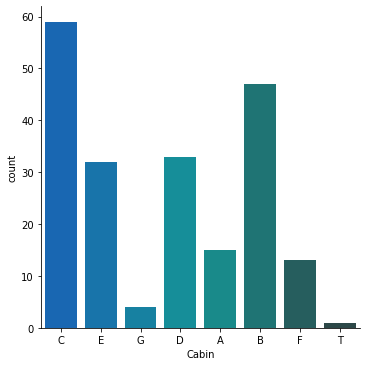

In [19]:
# create a quick visual for cabin distribution
sns.catplot(x = 'Cabin', data = cabin_df, palette = 'winter_d', kind = 'count')

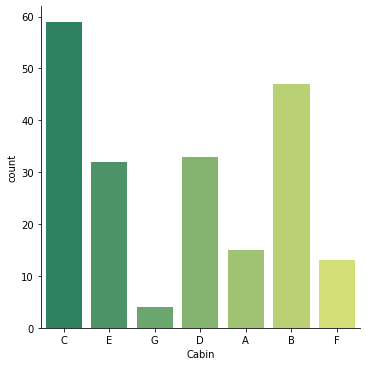

In [20]:
# notice we have a T cabin which can be a result of data error when input

# let clean the column
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x = 'Cabin', data = cabin_df, palette = 'summer', kind = 'count')

#### check to see where people Embarked from

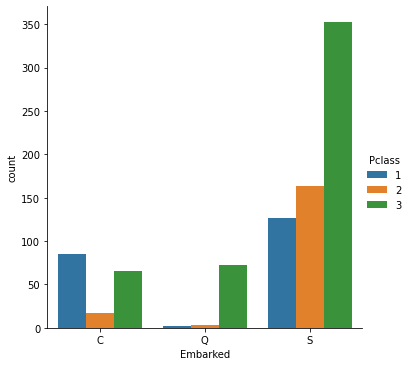

In [21]:
sns.catplot(x='Embarked', data = titanic_df, hue = 'Pclass', kind = 'count', order = ['C','Q','S'])

#### who is alone and who is with family

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [23]:
# make a new column to define alone, if the new column is anything but 0 then they are not alone
titanic_df['alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [24]:
titanic_df['alone'].loc[titanic_df.alone > 0] = 'with Family'
titanic_df['alone'].loc[titanic_df.alone == 0] = 'is alone'

F:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,is alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,is alone


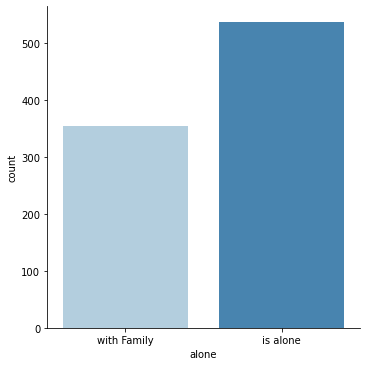

In [26]:
sns.catplot(x = 'alone', data=titanic_df, palette='Blues', kind='count')

# Big Question:
### what factors help someone survived the sinking of Titanic?

In [27]:
# another way to create new column is using map and dict key/value
# note: new dict with key 0 and 1, 0 is not survived, 1 is surived. value assigned based on the Survived column
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

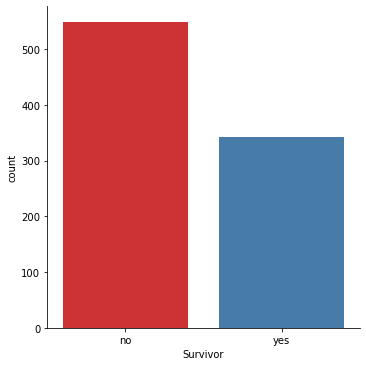

In [28]:
sns.catplot(x = 'Survivor', data=titanic_df, palette='Set1', kind='count')

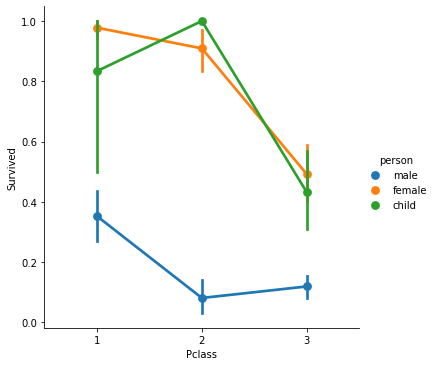

In [29]:
# survivors by class and gender/child
sns.catplot(x = 'Pclass', y = 'Survived', data=titanic_df, kind='point', hue='person' )

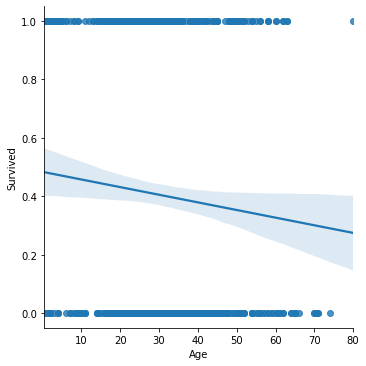

In [30]:
# does age played a factor?
sns.lmplot(x='Age', y='Survived', data=titanic_df)
# notice dots on top are people survived according to their age, same goes for bottom, line trending indicates, the older you are the less likely you will survived

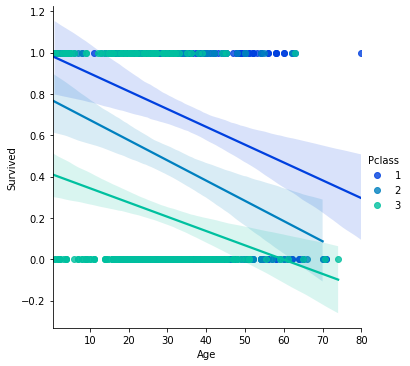

In [31]:
# survival trend by age and class
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Pclass', palette='winter')

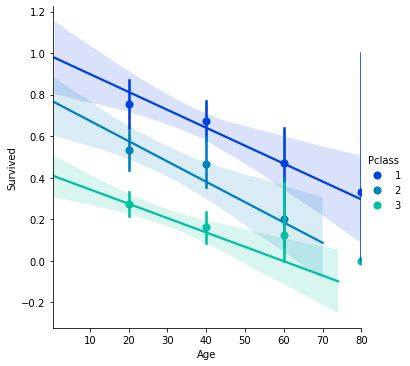

In [32]:
# showing standard deviation of survival trend among the classes
generations = [20,40,60,80]
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Pclass', palette='winter', x_bins = generations)

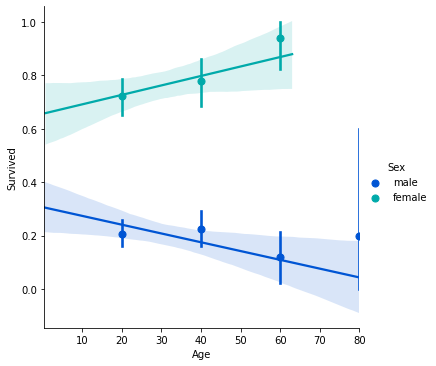

In [33]:
# showing survival trend base on age and sex, notice: older femail had higher chance of survival rate
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Sex', palette='winter', x_bins = generations)

### 1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
### 2.) Did having a family member increase the odds of surviving the crash?

In [78]:
# get a cleaned table with no NA in Cabin
titanic_df_2 = titanic_df[titanic_df.Cabin.notna()]
titanic_df_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family,yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,is alone,no
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,with Family,yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,is alone,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female,with Family,yes
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,male,is alone,no
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,female,with Family,yes
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,is alone,yes


In [96]:
# grab first letter as decl level
titanic_df_2['deck_lvl'] = titanic_df_2.Cabin.astype(str).str[0]
# dropping all indexes with value as T, error
titanic_df_2.drop(titanic_df_2[titanic_df_2.deck_lvl == 'T'].index, inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


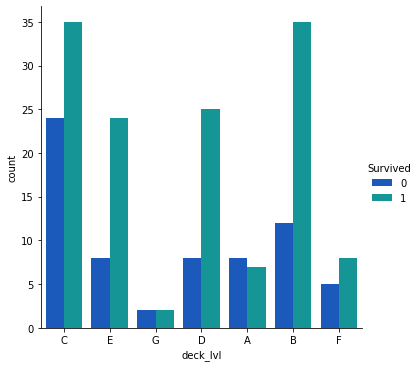

In [97]:
sns.catplot(x='deck_lvl',data=titanic_df_2, palette='winter', kind='count', hue='Survived')

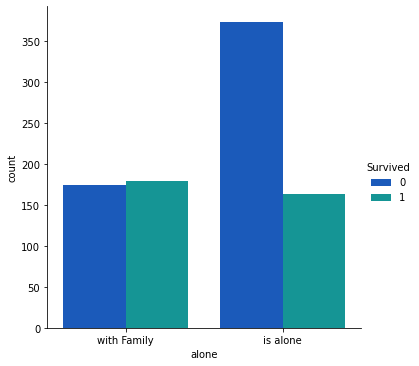

In [99]:
# Did having a family member increase the odds of surviving the crash?

sns.catplot(x='alone',data=titanic_df, palette='winter', kind='count', hue='Survived')